## Writing to Files and Reading from Them

So far, we have been working in "console world", a world where we print our output to our Jupyter notebeook cells, and we are happy to do it. But that has it's limitations. What makes these techniquest powerful, is our ability to save files to be accessed later, and to grab data and files from our computers or from data on the internet, or the world wide infonet as it was once called, albeit briefly.

Let's go there! 

### Writing to a File:

#### Some basics: 
Following the "law of primacy" ie; what you first learn you will remember most...here is the correct format for writing to a file:


In [1]:
#Please assign 'first_lines_leader.txt'. 
#Please replace "content" with the first 3 lines of your favorite speech made by a world leader.
#Then, run the code:

filename = 'first_lines_leader.txt'
content = 'I am certain that my fellow Americans expect that on my induction into the Presidency I will address them with a candor and a decision which the present situation of our Nation impels. This is preeminently the time to speak the truth, the whole truth, frankly and boldly. Nor need we shrink from honestly facing conditions in our country today.'
with open(filename, 'w') as file:
    file.write(content)
print(f"Content written to {filename} successfully.")

#Go to your finder. You should find your file in the same location as where you are working on this notebook.
#Confirm you located your file. it.

Content written to first_lines_leader.txt successfully.


### Let's break it down:

1. Filename and content as variables:
I assigned 'example.txt' to the filename variable and the string to the content variable. This is good practice because it makes the code more flexible and easier to modify.

2. with open('filename', 'w') as file:
This opens (or creates) a file named 'filename' in write mode ('w'), which will overwrite any existing content in the file.
file is the file object you are working with. The file is automatically closed after the block.

3. The content is then written to the file object you created. By the way you can call "file" anything. Lot's of times I'll write "fo" or even f

4. A print statement confirms it worked.


### Oh....Did you find your file in your finder? Assuming the answer is "yes"...good job! Now let's grab that content and read it to the console


In [3]:
#Below:
#filename is a string that holds the name of the file.
#file is the file object created by open(filename, 'r').
#The file.read() method reads the content of the file.
#The print(content) prints out what was read from the file.

with open(filename, 'r') as file:
    content = file.read()
print(content)

I am certain that my fellow Americans expect that on my induction into the Presidency I will address them with a candor and a decision which the present situation of our Nation impels. This is preeminently the time to speak the truth, the whole truth, frankly and boldly. Nor need we shrink from honestly facing conditions in our country today.


### Read vs Readlines
Above, we see that we can grab all the content of the fie using read(). This is a great way to go if we want to work with the file content as a whole, for example, searching for a word in the entire file, or processing word frequency distribution on a presidential speech.

But what if the the file is very large? Teading the entire content into memory can be inefficient or even cause memory issues. 

Or what if we want to process the file line by line and pull out spaces, or other extraneous info that we don't want? 

Readlines to the rescue! 
Readlines reads the file line by line and returns a list of strings, where each string represents a line from the file.

Use readlines() when you need to work with the file line by line, and you want to process or iterate over the lines.

Here is an example:

In [5]:
with open('first_lines_leader.txt', 'r') as file:
    lines = file.readlines()  # Reads the file and returns a list of lines
for line in lines:
    print(line.strip())  # Strip removes newline characters

I am certain that my fellow Americans expect that on my induction into the Presidency I will address them with a candor and a decision which the present situation of our Nation impels. This is preeminently the time to speak the truth, the whole truth, frankly and boldly. Nor need we shrink from honestly facing conditions in our country today.


### Alternative for very large files: 
I want to introduce you to this idea, because ChatGPT might suggest it, so I want you to be exposed and know what's going on.
For very large files, neither read() nor readlines() may be efficient. Instead, you can read the file line by line without loading the whole file into memory using what is called a file object iterator:



In [7]:

with open('first_lines_leader.txt', 'r') as file:
    for line in file:
        print(line.strip())

I am certain that my fellow Americans expect that on my induction into the Presidency I will address them with a candor and a decision which the present situation of our Nation impels. This is preeminently the time to speak the truth, the whole truth, frankly and boldly. Nor need we shrink from honestly facing conditions in our country today.


That said, you should use read() or readlines() in the majority of your cases as your file size will be moderately large at most.

### Some summary:

Opening a File:

Modes:
'r' = read
'w' = write (overwrites the file if it exists)
'a' = append (adds to the end of the file)
'b' = binary mode (for non-text files)



## All the President's Speeches 
20 pts

As we learned on Thursday, word frequency distribution is an intuitive way of determining the major themes, topics, or even preoccupations of the speech giver.

Pull texts from different US presidents and use FreqDist() to gain insights into the data. This is a fairly open assignment. The goal is to identify something interesting! Pull the text, tokenize, remove stopwords, and plot the frequency of the words. That's the technical part. But much of this assignment is your ability to use word frequency to gain insights comparatively, intra or inter presidents. Let the python notebook from our lecture be your guide! The more interesting and creative the analysis, the more points you will receive. We might pick one student's analysis to be displayed in lecture, and that person will receive bonus credit for the work.

For full credit, please demonstrate the use of read(), readlines(), and write() to a file in this assignment. Where you do it? Up to you!

In [ ]:
#Use as many cells as you need to. Your code here:

In [117]:
# Import necessary packages
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import inaugural

Analysis plan: Compare the content of presidents' first inaugural address with their second inaugural address. I will only include presidents that have been elected to consecutive terms (therefore, Cleveland will be excluded). I will only examine FDR's first two inaugural addresses. Essentially, I want to see if incumbency changes the content of presidents' inaugural addresses, particularly with references to self (i.e., 'I', 'me', 'myself') versus the public (i.e., 'we', 'us', 'ours').

In [15]:
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [37]:
# Create lists of presidents' first and second inaugural addresses

first_inaug = ['1789-Washington.txt', '1801-Jefferson.txt', '1809-Madison.txt', '1817-Monroe.txt', '1829-Jackson.txt', '1861-Lincoln.txt', '1869-Grant.txt', 
               '1897-McKinley.txt', '1913-Wilson.txt', '1933-Roosevelt.txt', '1953-Eisenhower.txt', '1969-Nixon.txt', '1981-Reagan.txt', '1993-Clinton.txt', 
               '2001-Bush.txt', '2009-Obama.txt']

second_inaug = ['1793-Washington.txt', '1805-Jefferson.txt', '1813-Madison.txt', '1821-Monroe.txt', '1833-Jackson.txt', '1865-Lincoln.txt', '1873-Grant.txt', 
                '1901-McKinley.txt', '1917-Wilson.txt', '1937-Roosevelt.txt', '1957-Eisenhower.txt', '1973-Nixon.txt', '1985-Reagan.txt', '1997-Clinton.txt', 
                '2005-Bush.txt', '2013-Obama.txt']

In [153]:
# First, investigate the average word count for each list of speeches

def average_word_count(speeches):
    ''' Function to calculate the average word count of a list of speeches '''
    total_words = 0
    for speech in speeches:
        # Read the speech text tokenized as words
        words = inaugural.words(speech)
        # Add to the total word count
        total_words += len(words)
    # Return the average length
    return total_words / len(speeches)

# Calculate average length of first and second inaugural speeches

avg_first_inaug = average_word_count(first_inaug)
avg_second_inaug = average_word_count(second_inaug)

print(avg_first_inaug)
print(avg_second_inaug)

2351.8125
2031.0625


In [167]:
# Combine all the speeches in first_inaug using .append() method
content1_list = []
for speech in first_inaug:
    # Read the speech text
    text = inaugural.raw(speech)
    # Append the speech content to the list
    content1_list.append(text)

# Combine all the speeches in second_inaug using .append() method
content2_list = []
for speech in second_inaug:
    # Read the speech text
    text = inaugural.raw(speech)
    # Append the speech content to the list
    content2_list.append(text)

# Join the lists into single strings, with double newlines separating each speech
content1 = '\n\n'.join(content1_list)
content2 = '\n\n'.join(content2_list)

In [85]:
# Save raw combined speeches as .txt files for future analytical work

filename1 = 'first_inaug.txt'
with open(filename1, 'w', encoding = 'utf-8') as file:
    file.write(content1)
print(f"Content written to {filename1} successfully.")

filename2 = 'second_inaug.txt'
with open(filename2, 'w', encoding = 'utf-8') as file:
    file.write(content2)
print(f"Content written to {filename2} successfully.")

Content written to first_inaug.txt successfully.
Content written to second_inaug.txt successfully.


In [155]:
# Open the .txt files for analysis

with open('first_inaug.txt', 'r') as file:
    content1 = file.read()

with open('second_inaug.txt', 'r') as file:
    content2 = file.read()

In [127]:
# Tokenize the combined speeches into words. Convert all words to lower case to be compatible with stopwords.

content1_words = word_tokenize(content1)
content1_words_lower = [word.lower() for word in content1_words]
print(content1_words_lower[:10])  # Print the first 10 tokens for verification

content2_words = word_tokenize(content2)
content2_words_lower = [word.lower() for word in content2_words]
print(content2_words_lower[:10])  # Print the first 10 tokens for verification

['fellow-citizens', 'of', 'the', 'senate', 'and', 'of', 'the', 'house', 'of', 'representatives']
['fellow', 'citizens', ',', 'i', 'am', 'again', 'called', 'upon', 'by', 'the']


In [147]:
stopwords = nltk.corpus.stopwords.words('english')

# Add to list of stopwords based upon frequently-appearing insignificant words in the word lists

new_stops = [',', ';', '.', '--']

stopwords.extend(new_stops)

# Remove references to self and the public from the list of stopwords

keep_stops = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

# Remove keep_stops from the stopwords list
for word in keep_stops:
    if word in stopwords:
        stopwords.remove(word)

print(stopwords)

['you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't"

[('our', 591), ('we', 491), ('i', 260), ('us', 154), ('people', 137), ('government', 136), ('my', 130), ('must', 107), ('world', 90), ('every', 85), ('great', 85), ('upon', 85), ('shall', 84), ('may', 77), ('country', 74), ('states', 73), ('nation', 70), ("'s", 67), ('one', 64), ('me', 62)]


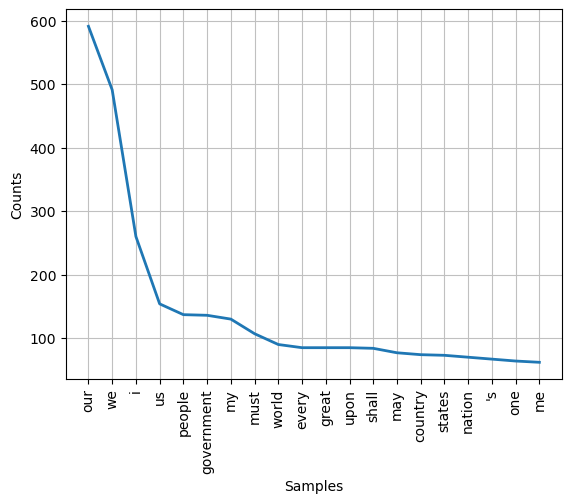

Axes(0.125,0.11;0.775x0.77)


In [149]:
# Remove stopwords from word lists
clean1 = []

for word in content1_words_lower:
    if not word in stopwords:
        clean1.append(word)

# Display top 20 most frequently-appearing words

fdist1 = FreqDist(clean1)

fdist1_top20 = fdist1.most_common(20)
print(fdist1_top20)

print(fdist1.plot(20))

[('our', 543), ('we', 484), ('i', 162), ('us', 150), ('people', 121), ('government', 107), ('my', 106), ('world', 96), ('nation', 85), ('great', 84), ('new', 83), ('peace', 79), ('must', 78), ('america', 74), ('time', 74), ('may', 73), ('every', 72), ('war', 70), ('freedom', 69), ('states', 64)]


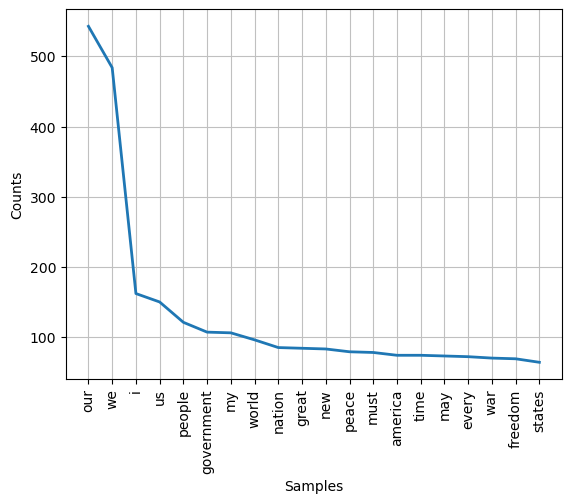

Axes(0.125,0.11;0.775x0.77)


In [151]:
# Remove stopwords from word lists
clean2 = []

for word in content2_words_lower:
    if not word in stopwords:
        clean2.append(word)

# Display top 20 most frequently-appearing words

fdist2 = FreqDist(clean2)

fdist2_top20 = fdist2.most_common(20)
print(fdist2_top20)

print(fdist2.plot(20))

Interestingly, many of the same words appear in presidents' first and second inaugural addresses in similar frequencies. Interestingly, although the word "I" appears a lot in both sets of inaugural addresses, it appears far fewer times in presidents' second inaugural addresses (162 total times) than in presidents' first inaugural addresses (260 total times). Some of this probably be due to the shorter average length of presidents' second inaugural addresses (avg. length of 
2031.062 words) compared to their first inaugural address (avg. length of 2351.8125 words), but it also may be the case that presidents who have been elected to a second term choose to highlight the collective accomplishments of the previous 4 years in office rather than what they will do as an individual to enact new policy change.55

In [185]:
# using .readlines() didn't really fit with my analysis plan, but here it is to demonstrate usage in context

with open('first_inaug.txt', 'r') as file:
    lines = file.readlines()  # Reads the file and returns a list of lines
for line in lines[:5]:  # Use slicing to get the first 5 lines
    print(line.strip()) 

Fellow-Citizens of the Senate and of the House of Representatives:

Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could not bu

It's not entirely clear to me why this code shows the first 3 paragraphs(lines) rather than the first 5. When I run print(lines) - I didn't include this in my GitHub submission because the text that is printed is unnecessarily long - each paragraph ends with ... \n'. Each paragraph is then followed by '\n', and then the next paragraph begins. My thought here is that each time \n appears, it counts as a line. \n appears for the fifth time at the end of the third paragraph, which I believe is why printing ceases at this point. How should I correct this for furture work?

In [187]:
!pip install beautifulsoup4

### Scraping
That's great that we can analyze text that is pre-processed in the NLTK package. But what if NLTK doesn't have the text we want? I mean as awesome as Jane Austen and inaugural texts are.... 

Text scraping, also known as web scraping or data scraping, refers to the process of automatically extracting text data from websites or other online sources. Over my 14 years, I have seen companies and websites realize that they should not just easily give away their text data. Scraping used to be easy. Data used to be easy to grab from the internet. It's gotten harder for some sites, but others allow access, or simply haven't gotten around to restricting it. **WHEN SCRAPING, PLEASE MAKE SURE YOU ARE NOT VIOLATING TERMS OF USE**. Usually, these apply to commercial use, and for research or academic purposes, there are fewer restrictions. 

Below is some code for you to scrape a website. The package is called "Beautiful Soup" I have given you code below to use.

I have given you TWO websites to scrape. PLEASE PICK ONE of TWO. Either:

A speech from Christine LaGrande on Sustainable Development Goal: Here is the url: https://www.imf.org/en/News/Articles/2018/09/17/sp09172018-the-case-for-the-sustainable-development-goals' OR

"Joint Statement of the Russian Federation and the People’s Republic of China on the International Relations Entering a New Era and the Global Sustainable Development" Feb, 2022. Here is the url: http://www.en.kremlin.ru/supplement/5770

In [189]:
import requests
from bs4 import BeautifulSoup
 
base_url = #use one the urls above as a string
r = requests.get(base_url)
soup = BeautifulSoup(r.text)
paragraphs = soup.find_all('p')

for p in paragraphs:
    print(p.get_text())

SyntaxError: invalid syntax (3010461718.py, line 4)

5 pts Modify the text above to write the text to a list called "document"


In [237]:
# Your code here:
import requests
from bs4 import BeautifulSoup

base_url = 'http://www.en.kremlin.ru/supplement/5770'
r = requests.get(base_url)
soup = BeautifulSoup(r.text)
paragraphs = soup.find_all('p')

# Initialize an empty list to store the text
document = []

# Iterate through each paragraph
for p in paragraphs:
    # Get the text, strip whitespace, and split into words
    words = p.get_text().strip().split()
    # Extend the document list with the words
    document.extend(words)

# Print the first 100 words to check above code
print(document[:100])

['All', 'content', 'on', 'this', 'site', 'is', 'licensed', 'under', 'Creative', 'Commons', 'Attribution', '4.0', 'International', 'At', 'the', 'invitation', 'of', 'President', 'of', 'the', 'People’s', 'Republic', 'of', 'China', 'Xi', 'Jinping,', 'President', 'of', 'the', 'Russian', 'Federation', 'Vladimir', 'V.', 'Putin', 'visited', 'China', 'on', '4', 'February', '2022.', 'The', 'Heads', 'of', 'State', 'held', 'talks', 'in', 'Beijing', 'and', 'took', 'part', 'in', 'the', 'opening', 'ceremony', 'of', 'the', 'XXIV', 'Olympic', 'Winter', 'Games.', 'The', 'Russian', 'Federation', 'and', 'the', "People's", 'Republic', 'of', 'China,', 'hereinafter', 'referred', 'to', 'as', 'the', 'sides,', 'state', 'as', 'follows.', 'Today,', 'the', 'world', 'is', 'going', 'through', 'momentous', 'changes,', 'and', 'humanity', 'is', 'entering', 'a', 'new', 'era', 'of', 'rapid', 'development', 'and', 'profound', 'transformation.']


In [ ]:
5 pts Write the code to a file called "document.txt"

In [225]:
# Your code here:

filename = 'document.txt'
with open(filename, 'w', encoding = 'utf-8') as file:
    for word in document:
        file.write(word + '\n')  # Write each word on a new line

print(f"Content written to {filename} successfully.")

Content written to document.txt successfully.


20 pts Clean the document of any extraneous elements, remove stopwords and perform a word frequency distribution analysis on your document, showing and then plotting the top 20 words

['Today,', 'the', 'world', 'is', 'going', 'through', 'momentous', 'changes,', 'and', 'humanity']
[('sides', 83), ('international', 71), ('cooperation', 36), ('development', 32), ('security', 30), ('global', 28), ('china', 26), ('states', 22), ('russia', 21), ('world', 20), ('united', 19), ('support', 19), ('new', 16), ('strengthen', 16), ('countries', 16), ('sustainable', 15), ('rights', 14), ('call', 14), ('human', 14), ('well', 14)]


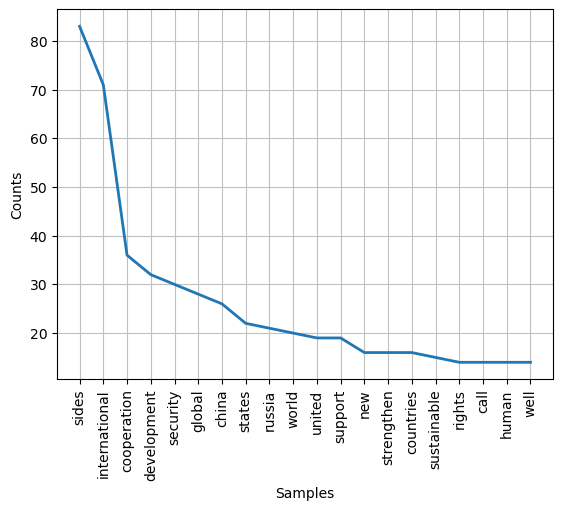

Axes(0.125,0.11;0.775x0.77)


In [239]:
# Your code here:

# Slice off the licensing agreement and other text that appears before the statement begins
document = document[79:]

# Print check
print(document[:10])

# Convert all words in the text to lower case so they are no longer case sensitive
document_lower = [word.lower() for word in document]

# Create list of stopwords
stopwords = nltk.corpus.stopwords.words('english')

# Remove stopwords from the text
document_clean = []

for word in document_lower:
    if not word in stopwords:
        document_clean.append(word)

# Display top 20 most frequently-appearing words

fdist = FreqDist(document_clean)

fdist_top20 = fdist.most_common(20)
print(fdist_top20)

print(fdist.plot(20))

5 pts Please read the speech. What does the word frequency tell us, if anything, about the speech? Please answer in a short paragraph that tells me how the word frequency distribution is good at finding meaning, but also may miss the meaning that you gained from actually reading the article.

Your paragraph here:

The word frequency distribution tells us broadly what topic areas the article is about, but this can also be achieved by reading the title of the statement. However, much of the context is missing. Simple word frequency distributions might not be well-equipped to tell us the directional thrust of a statement. For example, the frequency distribution doesn't tell us about China and Russia's general stance towards development (e.g., how it should be best achieved). Additionally, some words, like 'sides,' have very little interpretive meaning without reading the article and being placed in context. Before reading the article, I assumed that 'sides' was being used in an adversarial manner. However, after reading the article, it was clear that 'sides' was just used in place of saying 'Russia and China.'

### Intro to Summarization
Summarization has been a thorny problem for data scientists over the past decade. There have been many approaches, but most, until ChatGPT and it's use of the transformers' architecture, they have been unsatisfactory. There are two main types of summarization:

Extractive Summarization: Finding the most important sentences and rendering them verbatim.

Abstractive Summarization: Taking the most important ideas from a document and generating a summary based on them

There have been many different algorithms that have attempted summarization. Let's learn about one of the most used and deploy it in python.

#### Luhns Heuristic Method
This is one of the earliest approaches of text summarization. This is related to our manual interpretation of the importance of word frequency in a document.Basically, just as we did, Luhn recognized that word frequency and word significance is highly correlated, but only "important" words. The assumption that the most important sentences are those with the most significant words. Here is a nice short article that explains the algo in an accessible way: https://blog.fastforwardlabs.com/2016/03/25/h.p.-luhn-and-the-heuristic-value-of-simplicity.html

##### Sumy is a python package that has a lot of different commons summarization methods including LSA, LexRank and Luhn.

In [243]:
#install sumy package
!pip install sumy

Run the following code. Pass the document you want to summarize as a variable in the document part of the statement below. Use the variable that you saved the document into if it's something different.

PlaintextParser.from_string(document,Tokenizer("english"))

In [247]:
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

parser = PlaintextParser.from_string(document,Tokenizer("english"))

summarizer_luhn = LuhnSummarizer()
summary_1 = summarizer_luhn(parser.document,2)
for sentence in summary_1:
    print(sentence)

', 'It', 'sees', 'the', 'development', 'of', 'such', 'processes', 'and', 'phenomena', 'as', 'multipolarity,', 'economic', 'globalization,', 'the', 'advent', 'of', 'information', 'society,', 'cultural', 'diversity,', 'transformation', 'of', 'the', 'global', 'governance', 'architecture', 'and', 'world', 'order;', 'there', 'is', 'increasing', 'interrelation', 'and', 'interdependence', 'between', 'the', 'States;', 'a', 'trend', 'has', 'emerged', 'towards', 'redistribution', 'of', 'power', 'in', 'the', 'world;', 'and', 'the', 'international', 'community', 'is', 'showing', 'a', 'growing', 'demand', 'for', 'the', 'leadership', 'aiming', 'at', 'peaceful', 'and', 'gradual', 'development.
', 'I', 'The', 'sides', 'share', 'the', 'understanding', 'that', 'democracy', 'is', 'a', 'universal', 'human', 'value,', 'rather', 'than', 'a', 'privilege', 'of', 'a', 'limited', 'number', 'of', 'States,', 'and', 'that', 'its', 'promotion', 'and', 'protection', 'is', 'a', 'common', 'responsibility', 'of', 'the'

10 pts Evaluate the Luhn summarization below on the document you selected in the previous problem. How did it do?

Your evaluation here: The summary is okay at capturing the general platiudes within the statement particularly around democracy and a shifting global order, but this summary is quite surface-level. It doesn't capture some of the key subtext within the statement, namely that Russia and China seek to signal strengthened relations with one another and assert greater influence over global affairs and development efforts. However, this sentiment is never directly expressed and requires some interpretive capability, which I'm not sure this textual summarization method posesses. 

10 pts Now look at the documentation for Sumy and use the Lex Rank summarization algo.


In [249]:
# Your code here:

from sumy.summarizers.lex_rank import LexRankSummarizer

parser = PlaintextParser.from_string(document, Tokenizer("english"))
summarizer_lexrank = LexRankSummarizer()
summary_lexrank = summarizer_lexrank(parser.document, 2)
for sentence in summary_lexrank:
    print(sentence)

['Today,', 'the', 'world', 'is', 'going', 'through', 'momentous', 'changes,', 'and', 'humanity', 'is', 'entering', 'a', 'new', 'era', 'of', 'rapid', 'development', 'and', 'profound', 'transformation.
', 'It', 'sees', 'the', 'development', 'of', 'such', 'processes', 'and', 'phenomena', 'as', 'multipolarity,', 'economic', 'globalization,', 'the', 'advent', 'of', 'information', 'society,', 'cultural', 'diversity,', 'transformation', 'of', 'the', 'global', 'governance', 'architecture', 'and', 'world', 'order;', 'there', 'is', 'increasing', 'interrelation', 'and', 'interdependence', 'between', 'the', 'States;', 'a', 'trend', 'has', 'emerged', 'towards', 'redistribution', 'of', 'power', 'in', 'the', 'world;', 'and', 'the', 'international', 'community', 'is', 'showing', 'a', 'growing', 'demand', 'for', 'the', 'leadership', 'aiming', 'at', 'peaceful', 'and', 'gradual', 'development.


How does Lex Rank work? Explain it to me and evaluate the differences in the two algos.

5 pts Your explanation and evaluation here:

LexRank computes the similarity between every pair of sentences. It then determines the most central or "important" sentences based on their connections to other sentences. Sentences with the highest ranks are selected for the summary. Luhn’s summarization, however, prioritizes sentences based on word frequency. The two algorithms generate similar summarys in this context. The summary obtained using LexRank emphasizes global changes a bit more and the summary obtained using Luhn’s summarization contains additional content about democracy as a universal human value.

Using ChatGPT for Summarization
Now use Chatgpt to perform extractive and abstractive summarization on your document. Copy and paste into prompt. You will see that the document may be too long, so you may have to break the document into parts. Does where you break your document impact the summarization?

5 pts Copy and paste your prompt and the ChatGPT extractive summarization here:

I at first provided the promopt: Please use extractive summarization to summarize the following statement: (Do not summarize until all components of the statement have been entered. I will type "all statements have been entered.")

ChatGPT ignored this and summarized each of my three chunks of text individually. 

I then used this prompt after entering all chunks of text: Use extractive summarization to summarize the three previous chunks of text provided.

ChatGPT summary: 

Russia and China, as world powers and permanent members of the UN Security Council, intend to adhere to moral principles, advocate for a UN-centered international system, defend the world order based on international law, and promote multipolarity. They emphasize the concept of a “community of common destiny for mankind” and the significance of a just multipolar system.

The sides aim to uphold the outcomes of the Second World War, defend the authority of the UN, and condemn attempts to deny or distort its history. They call for new relationships based on mutual respect and peaceful coexistence, stating that their partnership surpasses Cold War-era alliances and has no “forbidden” areas of cooperation.

Both countries advocate for the consolidation of the international community and oppose confrontation between major powers. They support the WTO’s central role in the multilateral trade system and are committed to G20 cooperation, BRICS partnerships, and strengthening the Shanghai Cooperation Organization (SCO) for a multipolar world order. Additionally, they recognize the importance of cultural and humanitarian cooperation within the SCO and support APEC as a leading platform for economic dialogue in the Asia-Pacific region.

5 pts Copy and paste your prompt and the ChatGPT abstractive summarization here:

I used the same prompt (replacing 'extractive' with 'abstractive') and chunks as the previous example for consistency. Once again, ChatGPT ignored my initial prompt to wait to summarize all chunks together.

ChatGPT summary:

Russia and China are reaffirming their commitment to a cooperative international order based on shared moral principles and adherence to international law, emphasizing the central role of the United Nations. They advocate for a multipolar world and a democratization of international relations while resisting attempts to distort historical narratives, particularly regarding World War II.

The two nations are working towards establishing new relationships among global powers characterized by mutual respect and cooperation, distinguishing their partnership from Cold War alliances. They reject unilateral actions, promote trade facilitation under WTO rules, and emphasize the importance of multilateral cooperation through platforms like BRICS and the G20.

Within regional frameworks, particularly the Shanghai Cooperation Organization (SCO) and APEC, they aim to enhance security, trade, and humanitarian exchanges, fostering deeper ties among member states. Together, Russia and China seek to position themselves as leaders in promoting a stable and equitable international landscape while addressing common global challenges.

5 pts Does breaking the document in different places impact the summarization? Answer here:

Yes, breaking the document in different places could result in loss of context and therefore thematic incoherence of the summary provided. Additionally, if some points are repeated across sections, the summary may include redundant information or may it appear as if these repeated points are more central to the text than they actually are. This is why I asked ChatGPT to summarize all chunks of text together.

5 pts Watch this video, and be prepared for a quiz on it! 
https://www.youtube.com/watch?v=wjZofJX0v4M&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=5
